In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = "C:\\Data Science\\Data Science Nareshit\\EDA datasets\\visadataset.csv"
visa_df = pd.read_csv(file_path)

In [7]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


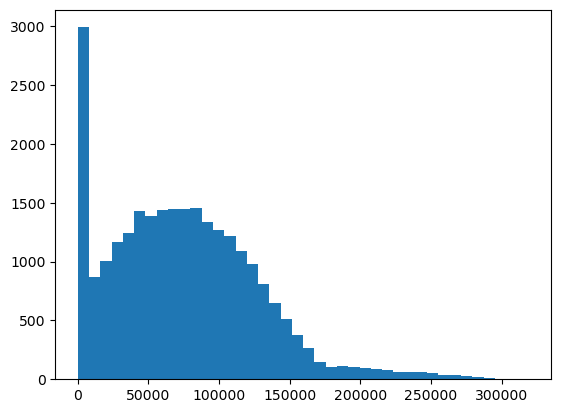

(40, 41, 40)

In [8]:
frequency,interval,n=plt.hist(visa_df['prevailing_wage'],bins=40)
plt.show()
len(frequency),len(interval),len(n)

In [1]:
cond1 = visa_df['prevailing_wage'] > 2.13670000e+00
cond2 = visa_df['prevailing_wage'] < 7982.34003e+03
cond1&cond2
len(visa_df[cond1&cond2])

NameError: name 'visa_df' is not defined

In [16]:
len(visa_df[visa_df['prevailing_wage'].between(2.13670000e+00,7.98234003e+03)])

2992

## Box Plot

<img src="https://www.simplypsychology.org/wp-content/uploads/box-whisker-plot.jpg" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 1200px; height: 193px; margin: 0px; width: 351px;" alt="Box Plot Explained: Interpretation, Examples, &amp; Comparison" jsname="kn3ccd" aria-hidden="false">

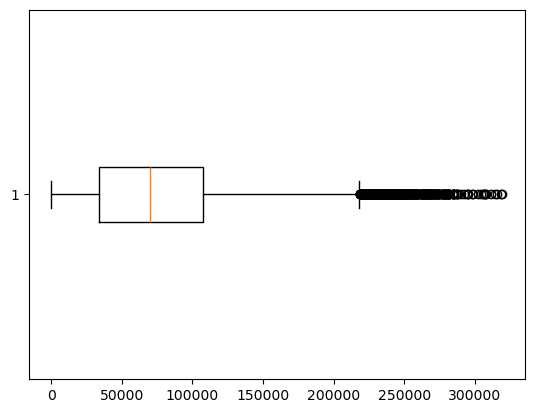

In [19]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

In [2]:
#step: 1 Calculate q1,q2,q3
q1 =np.quantile(visa_df['prevailing_wage'],0.25)
q2 =np.quantile(visa_df['prevailing_wage'],0.50)
q3 =np.quantile(visa_df['prevailing_wage'],0.75)
#step:2 Calculate IQR=(Q3-Q1)
iqr = q3-q1
#step:3 UpperBoundary = q3+1.5Iqr
ub = q3+1.5 * iqr
#step:4 LowerBoundary = q1-1.5iqr
lb = q1-1.5*iqr
#step:5 cond1 > ub
cond1 =  visa_df['prevailing_wage'] > ub
#step:6 cond1 < lb
cond2 =  visa_df['prevailing_wage'] < lb
#step:7 cond1|cond2
cond1&cond2
#step:8 cond[cond1|cond2]
outliers = visa_df['prevailing_wage'][cond1&cond2]
#series into array of values
outliers_data = outliers.values
len(outliers_data)

NameError: name 'np' is not defined

In [55]:
def outliers():
    #step: 1 Calculate q1,q2,q3
    q1 =np.quantile(visa_df['prevailing_wage'],0.25)
    q2 =np.quantile(visa_df['prevailing_wage'],0.50)
    q3 =np.quantile(visa_df['prevailing_wage'],0.75)
    #step:2 Calculate IQR=(Q3-Q1)
    iqr = q3-q1
    #step:3 UpperBoundary = q3+1.5Iqr
    ub = q3+1.5 * iqr
    #step:4 LowerBoundary = q1-1.5iqr
    lb = q1-1.5*iqr
    #step:5 cond1 > ub
    cond1 =  visa_df['prevailing_wage'] < ub
    #step:6 cond1 < lb
    cond2 =  visa_df['prevailing_wage'] > lb
    #step:7 cond1|cond2
    cond1&cond2
    #step:8 cond[cond1|cond2]
    non_outliers = visa_df['prevailing_wage'][cond1&cond2]
    #series into array of values
    non_outliers_data = non_outliers.values
    return (non_outliers_data)
non_outliers_data = outliers()
len(non_outliers_data),len(visa_df) ,len(non_outliers_data) * 100/len(visa_df)      

(25053, 25480, 98.32417582417582)

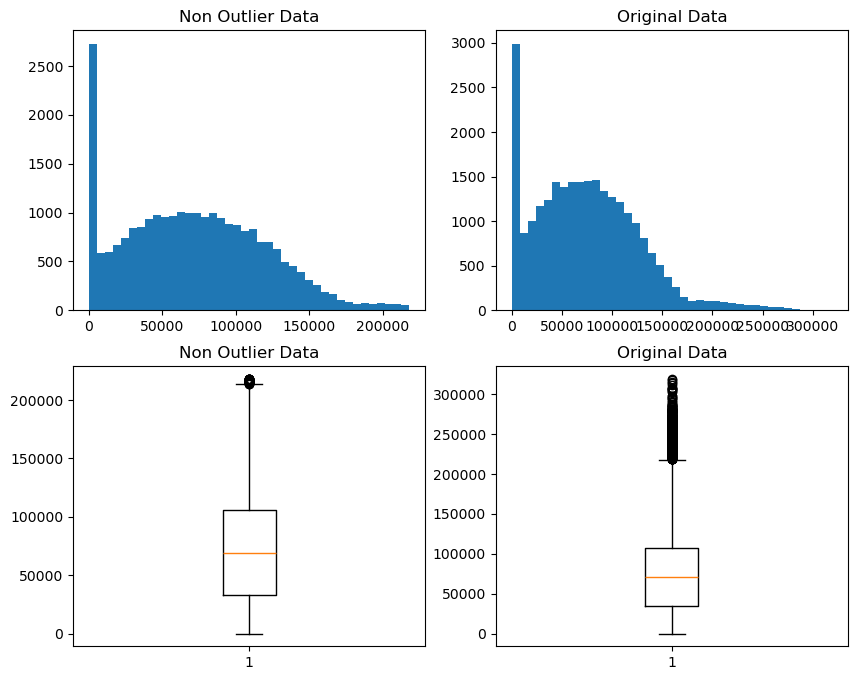

In [15]:
q1 =np.quantile(visa_df['prevailing_wage'],0.25)
q2 =np.quantile(visa_df['prevailing_wage'],0.50)
q3 =np.quantile(visa_df['prevailing_wage'],0.75)
#step:2 Calculate IQR=(Q3-Q1)
iqr = q3-q1
#step:3 UpperBoundary = q3+1.5Iqr
ub = q3+1.5 * iqr
#step:4 LowerBoundary = q1-1.5iqr
lb = q1-1.5*iqr
#step:5 cond1 > ub
cond1 =  visa_df['prevailing_wage'] < ub
#step:6 cond1 < lb
cond2 =  visa_df['prevailing_wage'] > lb
#step:7 cond1|cond2
cond1&cond2
#step:8 cond[cond1|cond2]
outliers = visa_df[cond1&cond2]
#series into array of values
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title("Non Outlier Data")
plt.hist(outliers['prevailing_wage'],bins=40)


plt.subplot(2,2,2)
plt.title("Original Data")
plt.hist(visa_df['prevailing_wage'],bins=40)


plt.subplot(2,2,3)
plt.title("Non Outlier Data")
plt.boxplot(outliers['prevailing_wage'])

plt.subplot(2,2,4)
plt.title("Original Data")
plt.boxplot(visa_df['prevailing_wage'])
plt.show()


In [16]:
ub,lb

(218315.56125000003, -76564.56875000002)

In [23]:
new_data = []
for i in visa_df['prevailing_wage'].values:
    if i >ub or i<lb:
        new_data.append(visa_df['prevailing_wage'].median())
    else:
        new_data.append(i)
len(new_data)    

25480

In [26]:
dict1={'col1':[1,2,3,4],
       'col2':['A','B','C','D']}
data=pd.DataFrame(dict1)

In [27]:
data

,col1,col2
0,1,A
1,2,B
2,3,C
3,4,D


In [28]:
con = data['col1']>2
np.where(con,100,data['col1'])

array([  1,   2, 100, 100], dtype=int64)

In [3]:
data['col3']=[100,200,300,400]

NameError: name 'data' is not defined

In [30]:
data

,col1,col2,col3
0,1,A,100
1,2,B,2003
2,3,C,300
3,4,D,400


In [31]:
con =  data['col1'] >2
data['col4']=np.where(con,100,data['col1'])

In [32]:
data

,col1,col2,col3,col4
0,1,A,100,1
1,2,B,2003,2
2,3,C,300,100
3,4,D,400,100


In [4]:
#Drop unwanted columns
data.drop('col2',axis =1,inplace =True)

NameError: name 'data' is not defined

In [44]:
data

,col1,col3,col4
0,1,100,1
1,2,2003,2
2,3,300,100
3,4,400,100


In [48]:
#step: 12,3 Condition
con1 = visa_df['prevailing_wage'] > ub
con2 = visa_df['prevailing_wage'] < lb
con = con1|con2
#step:4 median
wage_median = visa_df['prevailing_wage'].median()
visa_df['prevailing_wage'] = np.where(con,wage_median,visa_df['prevailing_wage'])
visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476     70308.2100
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

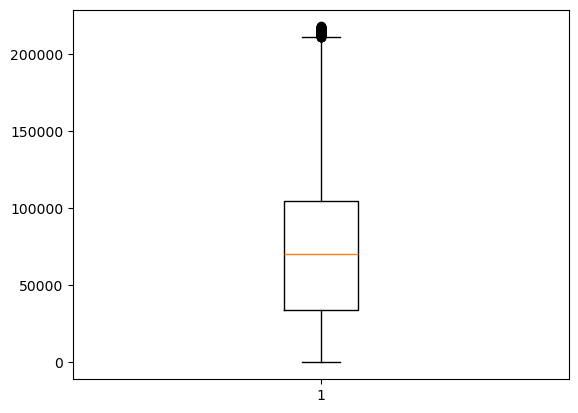

In [50]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()